In [ ]:
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
import time

wc = Counter()
Host = 'https://www.104.com.tw'
lan_list = []
count = 0
for i in range(1,151):
    try:
#         if i % 27 == 0:
#             time.sleep(10)

        url = Host + "/jobbank/joblist/joblist.cfm?jobsource=n104bank1&ro=1&keyword=%E8%BB%9F%E9%AB%94%E5%B7%A5%E7%A8%8B%E5%B8%AB&order=1&asc=0&page={}".format(i)
    #     print(url)
        res = r.get(url)
        soup = BeautifulSoup(res.text, 'lxml')
        rows = soup.select(".j_cont > ul > li  > div > a")

        for ind in rows:
            href = Host+ind['href']
            if( "jobno" in href):  
                lan_list.append(href)
#                 print(len(lan_list))
                print(href)
                count += 1
                print(count)
                res2 = r.get(href)
                soup = BeautifulSoup(res2.text, 'lxml')
                lans = soup.select('.tool')[0].select('a')  #lans  is  list
#                 print(lans)
                for lan in lans :
                    if lan.text in wc:
                        wc[lan.text] +=1
                    else :
                        wc[lan.text] = 1
    except:
        continue
    print('[Debug] Page {} is finished'.format(i))
# df = pd.DataFrame(wc.most_common())   #pandas
# lan_csv = df.to_csv('lan.csv')       #save to csv
# df.head(10)
with open('104.csv', 'w') as fw2:
    for lang, counts in wc.most_common():
        fw2.write('{},{}\n'.format(lang,counts))
# 28  63  


https://www.104.com.tw/job/?jobno=4vvim&jobsource=104_hotorder
1
https://www.104.com.tw/job/?jobno=2t3wm&jobsource=104_hotorder
2
https://www.104.com.tw/job/?jobno=3qx9q&jobsource=104_hotorder
3
https://www.104.com.tw/job/?jobno=5gm3p&jobsource=104_hotorder
4
https://www.104.com.tw/job/?jobno=5edsi&jobsource=104_hotorder
5
https://www.104.com.tw/job/?jobno=5edsi&jobsource=104_hotorder
6
https://www.104.com.tw/job/?jobno=5c98t&jobsource=104_hotorder
7
https://www.104.com.tw/job/?jobno=5f51j&jobsource=104_hotorder
8
https://www.104.com.tw/job/?jobno=5f51j&jobsource=104_hotorder
9
https://www.104.com.tw/job/?jobno=5bebg&jobsource=104_hotorder
10
https://www.104.com.tw/job/?jobno=475dt&jobsource=n104bank1&hotjob_chr=
11
https://www.104.com.tw/job/?jobno=3mi7n&jobsource=n104bank1&hotjob_chr=
12
https://www.104.com.tw/job/?jobno=4lgy0&jobsource=n104bank1&hotjob_chr=
13
https://www.104.com.tw/job/?jobno=2gr2o&jobsource=n104bank1&hotjob_chr=
14
https://www.104.com.tw/job/?jobno=4wj8d&jobsource

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('./104.csv')[:15]
df

,Programming language,counter
0,C++,569
1,C,443
2,Java,426
3,C#,411
4,JavaScript,318
5,MS SQL,286
6,Linux,272
7,HTML,227
8,ASP.NET,198
9,MySQL,170


In [12]:
lan_csv = df.head(20)
lan_csv

,Programming language,counter
0,C++,569
1,C,443
2,Java,426
3,C#,411
4,JavaScript,318
5,MS SQL,286
6,Linux,272
7,HTML,227
8,ASP.NET,198
9,MySQL,170


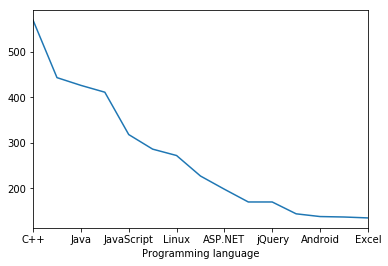

In [13]:
df.index = df['Programming language']
df['counter'].plot()
plt.show()

In [ ]:
df.index = df['Programming language']
df['counter'].plot()
fig, ax = plt.subplots(figsize=(10,8))
ind = np.arange(df.index)
bars = ax.bar(ind, top_weights, color='blue', edgecolor='black')
plt.show(fig)

In [ ]:
import jieba
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))

In [ ]:
with open('lan.csv', 'r') as f:
    lan = f.read().split() 
lan                           #lan is list  
# len(lan)

#list  use  join 一次放一個  （如果str永join一次放一個char)
# with open('lan.text', 'w') as f:
#     f.write('\n'.join(lan))                 

#str 直接write 
with open('lan.text', 'w') as f:         #with open('lan.text', 'a') as f:    #append
    for ind in range(2,len(lan)):
        lan_pro = lan[ind].split(',')[0]
#         print(lan_pro)
        f.write(lan_pro + '\n')             

In [ ]:
#write  in  csv
with open('lan2.csv', 'w') as f:        
    for ind in range(2,len(lan)):
        lan_pro = lan[ind].split(',')[0]
    #     print(lan_pro)

        f.write(lan_pro + '\n')  

In [5]:
with open('104.csv', 'r') as f:        
    lan = f.read().split()
lan
# del lan[0]
# lan

['0,C++,648',
 '1,C,507',
 '2,Java,489',
 '3,C#,469',
 '4,JavaScript,356',
 '5,MS',
 'SQL,323',
 '6,Linux,318',
 '7,HTML,256',
 '8,ASP.NET,227',
 '9,jQuery,201',
 '10,MySQL,186',
 '11,PHP,160',
 '12,Android,155',
 '13,Word,151',
 '14,Excel,148',
 '15,Visual',
 'C++,131',
 '16,Oracle,125',
 '17,PowerPoint,112',
 '18,Visual',
 'Studio',
 '.net,99',
 '19,Visual',
 'Basic',
 '.net,99',
 '20,Visual',
 'C#,98',
 '21,Objective-C,97',
 '22,AJAX,95',
 '23,JSP,92',
 '24,Python,91',
 '25,C++.Net,85',
 '26,XML,82',
 '27,iOS,81',
 '28,Outlook,74',
 '29,Visual',
 'Studio,73',
 '30,Visual',
 'Basic,66',
 '31,TCP/IP,57',
 '32,Spring,56',
 '33,J2EE,55',
 '34,Windows',
 '7,55',
 '35,DHTML,48',
 '36,HTTP,46',
 '37,Windows',
 'Server',
 '2008,45',
 '38,OOP,44',
 '39,MFC,43',
 '40,Windows',
 'XP,40',
 '41,Struts,38',
 '42,PL/SQL,38',
 '43,Windows',
 'Server',
 '2012,37',
 '44,Delphi,35',
 '45,Tomcat,35',
 '46,Windows',
 '2000,34',
 '47,SWIFT,33',
 '48,JDBC,33',
 '49,LabVIEW,32',
 '50,ASP,30',
 '51,Mac',
 '

In [15]:
with open('lan.csv', 'w') as f:        
    f.write('\n'.join(lan))
lan

['0,C++,648',
 '1,C,507',
 '2,Java,489',
 '3,C#,469',
 '4,JavaScript,356',
 '5,MS',
 'SQL,323',
 '6,Linux,318',
 '7,HTML,256',
 '8,ASP.NET,227',
 '9,jQuery,201',
 '10,MySQL,186',
 '11,PHP,160',
 '12,Android,155',
 '13,Word,151',
 '14,Excel,148',
 '15,Visual',
 'C++,131',
 '16,Oracle,125',
 '17,PowerPoint,112',
 '18,Visual',
 'Studio',
 '.net,99',
 '19,Visual',
 'Basic',
 '.net,99',
 '20,Visual',
 'C#,98',
 '21,Objective-C,97',
 '22,AJAX,95',
 '23,JSP,92',
 '24,Python,91',
 '25,C++.Net,85',
 '26,XML,82',
 '27,iOS,81',
 '28,Outlook,74',
 '29,Visual',
 'Studio,73',
 '30,Visual',
 'Basic,66',
 '31,TCP/IP,57',
 '32,Spring,56',
 '33,J2EE,55',
 '34,Windows',
 '7,55',
 '35,DHTML,48',
 '36,HTTP,46',
 '37,Windows',
 'Server',
 '2008,45',
 '38,OOP,44',
 '39,MFC,43',
 '40,Windows',
 'XP,40',
 '41,Struts,38',
 '42,PL/SQL,38',
 '43,Windows',
 'Server',
 '2012,37',
 '44,Delphi,35',
 '45,Tomcat,35',
 '46,Windows',
 '2000,34',
 '47,SWIFT,33',
 '48,JDBC,33',
 '49,LabVIEW,32',
 '50,ASP,30',
 '51,Mac',
 '